In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
our_color_palette ={"WT": "#F2C14E", "KO": "#F15BB5", "OE": "#368F8B"}
genotype_dict = {"dicer_ko": "KO", "dicer_overexpressed": "OE", "wild_type": "WT"}

### Load mutation calls

In [3]:
fname_mutations_all_samples = 'mutations_of_all_samples_after_filtering.csv'

df = pd.read_csv(fname_mutations_all_samples)
df = df.drop(['Unnamed: 0'], axis=1)
df = df[df['genotype']!='aaa_parental_stock']

In [4]:
df["genotype"] = df["genotype"].apply(lambda x: genotype_dict[x])

### Filter mutations

In [5]:
# minimum mutation frequency
minimum_frequency_threshold = 0.0001 
df = df[df['frequency']>=minimum_frequency_threshold]

In [6]:
# test
df[df['frequency']>=1.0]

,Chromosome,Pos,Ref,Var,Frq1,Frq2,Frq3,Pst1,Pst2,Pst3,...,Pval,Qval,genotype,passage,replicate,n_reads_var,coverage,frequency,Frq_ave,position


### Figure 3B --- Mutation frequency spectrum

In [7]:
# define mutation spectrum 

mutation_spectrum_bins = [(0.0001,0.001),(0.001,0.01), (0.01,1)]
mutation_spectrum_bins_labels = ["[0.0001, 0.001)","[0.001, 0.01)", "[0.01, 1)"]

In [8]:
# compute mutation spectrum 

df_mut_spec_long = pd.DataFrame()


for genotype in ['WT', 'KO', 'OE']:
    for passage in [1, 5, 10]:
        for replicate in ['replicate_d', 'replicate_b', 'replicate_a', 'replicate_e','replicate_c']:
            
            df_temp = df[df['genotype']== genotype]
            df_temp = df_temp[df_temp['passage']==passage]
            df_temp = df_temp[df_temp['replicate']==replicate]
            
            for bin_label, curr_bin in zip(mutation_spectrum_bins_labels, mutation_spectrum_bins):
                
                df_t = df_temp[df_temp["frequency"] >= curr_bin[0]]
                df_t = df_t[df_t["frequency"] < curr_bin[1]]
                counts = df_t.shape[0]
                
                df_mut_spec_long = pd.concat([pd.DataFrame({'genotype': [genotype], 
                                                       'passage': passage, 
                                                       'replicate': replicate, 
                                                       "mutation_freq": str(bin_label), 
                                                       "number_SNVs": counts
                                                        }
                                                     ), 
                                         df_mut_spec_long], 
                                        ignore_index=True)

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_46422/3895634498.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


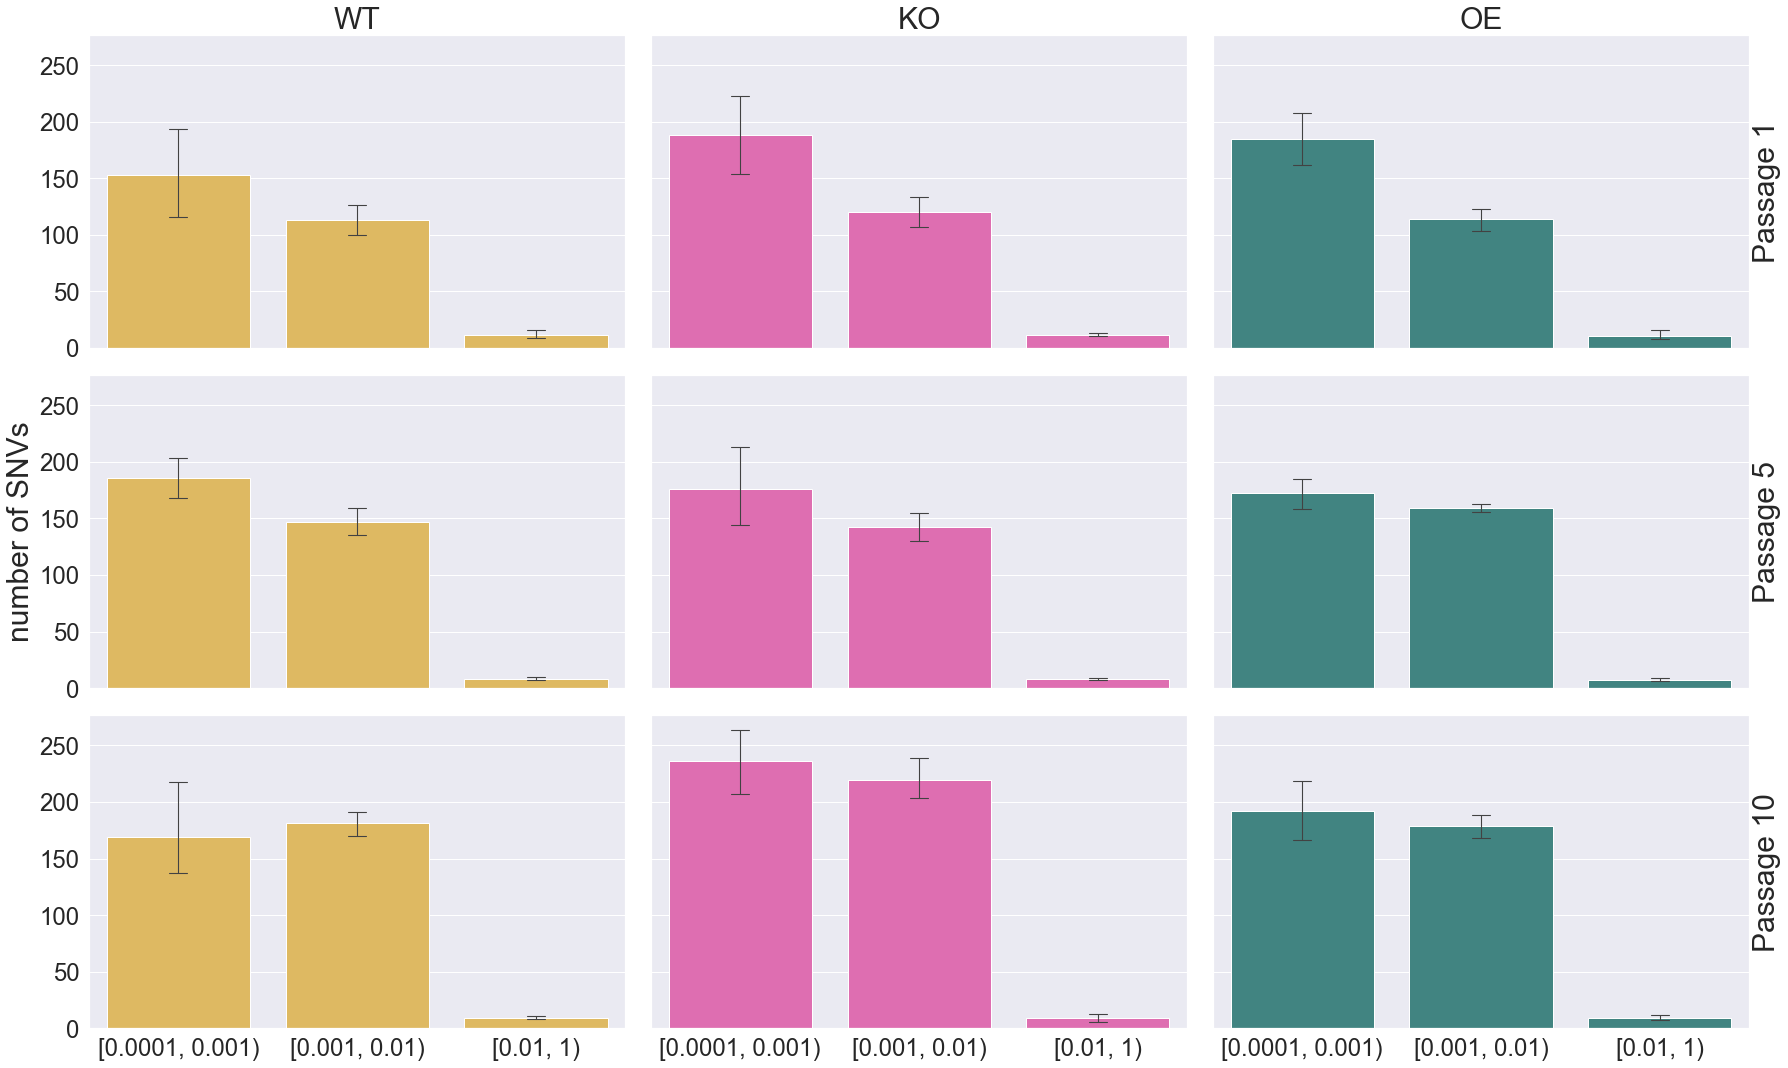

In [20]:
fig, ax = plt.subplots(3,3, sharex=True, sharey=True, figsize=(25,15))

sns.set_theme()

gt_order = ["WT", "KO", "OE"]
passage_order = [1, 5, 10]

for idx_gt, gt in enumerate(gt_order):
    for idx_passage, passage in enumerate(passage_order):
        data = df_mut_spec_long[(df_mut_spec_long["genotype"]==gt) & (df_mut_spec_long["passage"]==passage)]

        gt_color = our_color_palette[gt]

        sns.barplot(
            ax=ax[idx_passage][idx_gt],
            data=data, 
            x="mutation_freq", 
            y='number_SNVs', 
            
            errwidth=1.1, 
            capsize=0.1,
            order=mutation_spectrum_bins_labels, 
            color=gt_color,
            dodge=0.3, 
        )
        ax[idx_passage][idx_gt].set_xlabel("")
        ax[idx_passage][idx_gt].set_ylabel("")
        
        #ax[idx_passage][idx_gt].set_ylim((0,320))
        
        # add the annotation
        #ax[idx_passage][idx_gt].bar_label(ax[idx_passage][idx_gt].containers[-1], 
        #                                  fmt='%.f', 
        #                                  label_type='edge', 
        #                                  padding = 40,
        #                                  size = 24)

        
        
ax[2][0].tick_params(axis='x', labelsize = 24)
ax[2][1].tick_params(axis='x', labelsize = 24)
ax[2][2].tick_params(axis='x', labelsize = 24)

ax[0][0].tick_params(axis='y', labelsize = 24)
ax[1][0].tick_params(axis='y', labelsize = 24)
ax[2][0].tick_params(axis='y', labelsize = 24)

ax[0][0].set_title("WT", fontsize=30)
ax[0][1].set_title("KO", fontsize=30)
ax[0][2].set_title("OE", fontsize=30)

ax[0][2].set_ylabel("Passage 1", fontsize=30)
ax[0][2].yaxis.set_label_position("right")
ax[1][2].set_ylabel("Passage 5", fontsize=30)
ax[1][2].yaxis.set_label_position("right")
ax[2][2].set_ylabel("Passage 10", fontsize=30)
ax[2][2].yaxis.set_label_position("right")


ax[1][0].set_ylabel("number of SNVs", fontsize=30)
ax[1][0].yaxis.set_label_position("left")


fig.tight_layout()
fig.show()


In [15]:
fig.savefig("./000__Manuscript_figures/Figure_3B__mutation_spectrum.pdf")
fig.savefig("./000__Manuscript_figures/Figure_3B__mutation_spectrum.svg")

### get information for main text

In [11]:
# "[0.0001, 0.001)","[0.001, 0.01)", "[0.01, 1)"

# min number of SNVs with frequency below 1%

df_mut_spec_long[df_mut_spec_long['mutation_freq'].isin(["[0.0001, 0.001)","[0.001, 0.01)"])].pivot_table(
    values = 'number_SNVs',
    index= ['genotype', 'passage', 'replicate'],
    aggfunc='sum')['number_SNVs'].min()

179

In [12]:
# max number of SNVs with frequency below 1%

df_mut_spec_long[df_mut_spec_long['mutation_freq'].isin(["[0.0001, 0.001)","[0.001, 0.01)"])].pivot_table(
    values = 'number_SNVs',
    index= ['genotype', 'passage', 'replicate'],
    aggfunc='sum')['number_SNVs'].max()

499

In [13]:
# min number of SNVs with frequency 1-100%

df_mut_spec_long[df_mut_spec_long['mutation_freq'].isin(["[0.01, 1)"])].pivot_table(
    values = 'number_SNVs',
    index= ['genotype', 'passage', 'replicate'],
    aggfunc='sum')['number_SNVs'].min()

5

In [14]:
# max number of SNVs with frequency 1-100%

df_mut_spec_long[df_mut_spec_long['mutation_freq'].isin(["[0.01, 1)"])].pivot_table(
    values = 'number_SNVs',
    index= ['genotype', 'passage', 'replicate'],
    aggfunc='sum')['number_SNVs'].max()

21

### Per repllcate plot

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_35561/1670779784.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


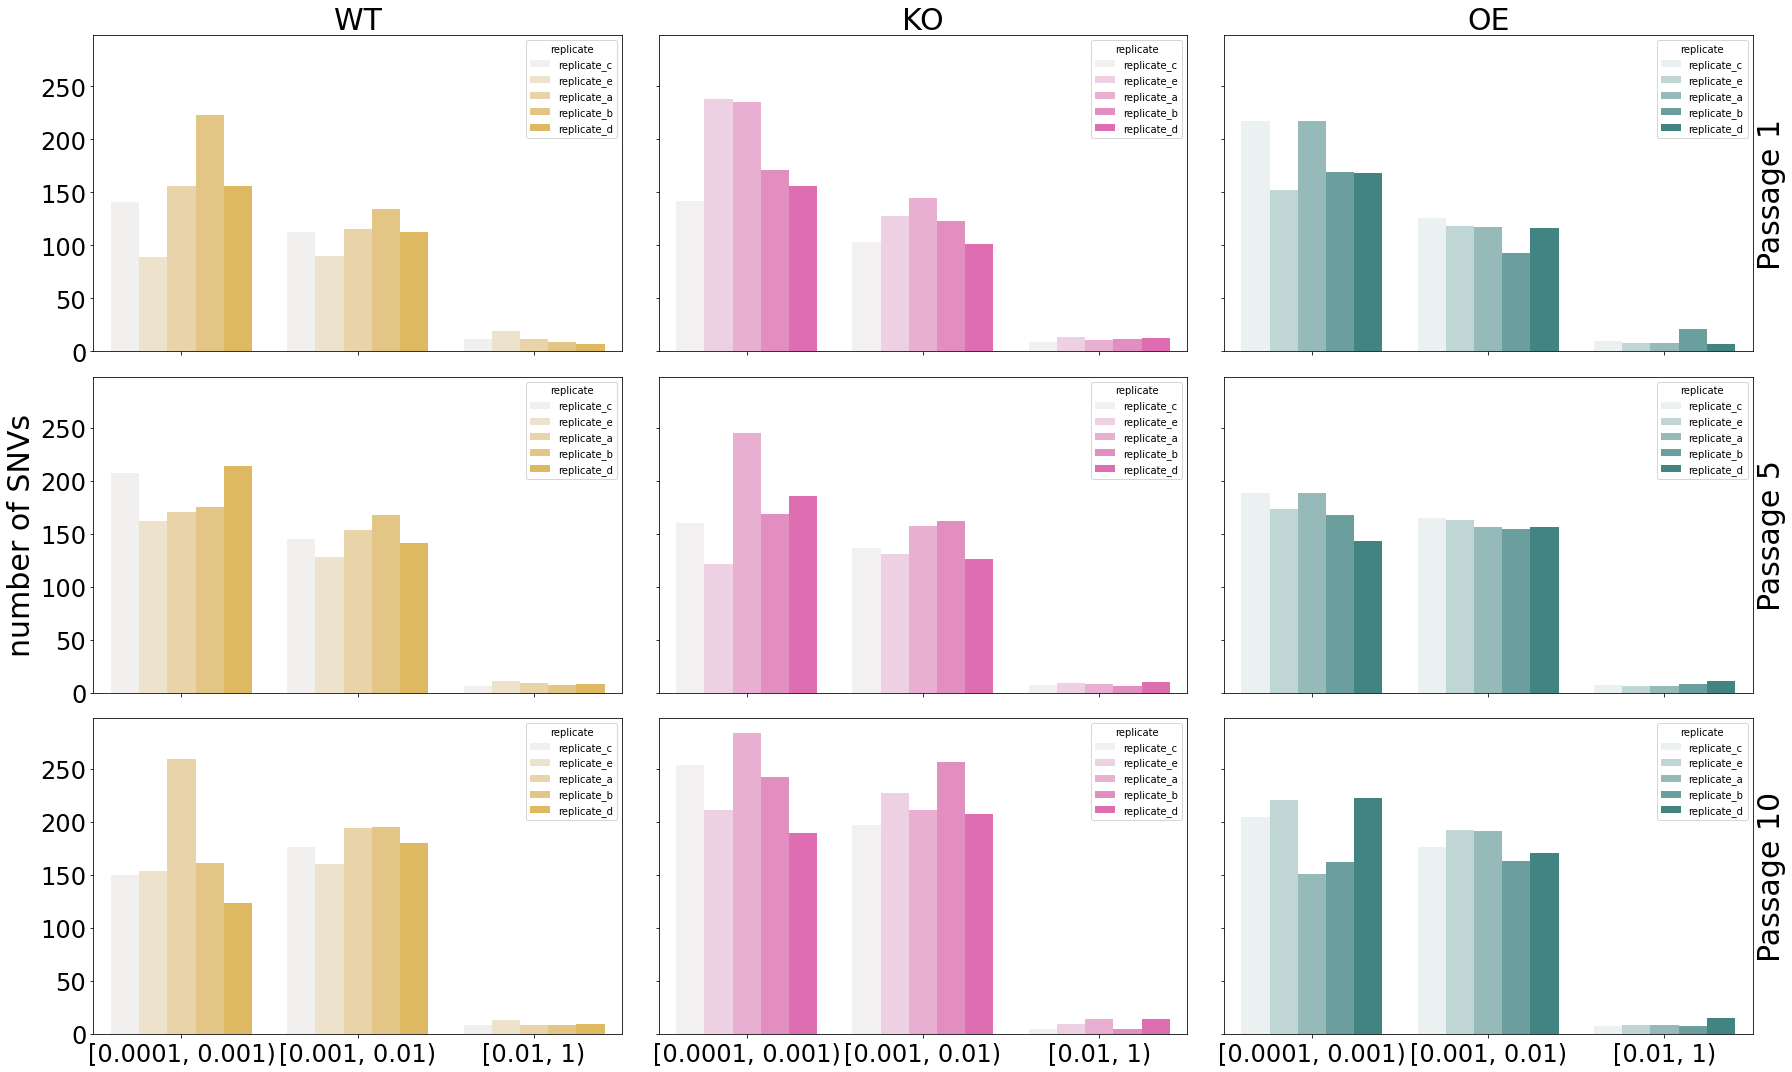

In [15]:
fig, ax = plt.subplots(3,3, sharex=True, sharey=True, figsize=(25,15))

gt_order = ["WT", "KO", "OE"]
passage_order = [1, 5, 10]

for idx_gt, gt in enumerate(gt_order):
    for idx_passage, passage in enumerate(passage_order):
        data = df_mut_spec_long[(df_mut_spec_long["genotype"]==gt) & (df_mut_spec_long["passage"]==passage)]

        gt_color = our_color_palette[gt]

        sns.barplot(
            ax=ax[idx_passage][idx_gt],
            data=data, 
            x="mutation_freq", 
            y='number_SNVs', 
            hue='replicate', 
            errwidth=1.1, 
            capsize=0.1,
            order=mutation_spectrum_bins_labels, 
            color=gt_color,
            dodge=0.3, 
        )
        ax[idx_passage][idx_gt].set_xlabel("")
        ax[idx_passage][idx_gt].set_ylabel("")
        

        
        
ax[2][0].tick_params(axis='x', labelsize = 24)
ax[2][1].tick_params(axis='x', labelsize = 24)
ax[2][2].tick_params(axis='x', labelsize = 24)

ax[0][0].tick_params(axis='y', labelsize = 24)
ax[1][0].tick_params(axis='y', labelsize = 24)
ax[2][0].tick_params(axis='y', labelsize = 24)

ax[0][0].set_title("WT", fontsize=30)
ax[0][1].set_title("KO", fontsize=30)
ax[0][2].set_title("OE", fontsize=30)

ax[0][2].set_ylabel("Passage 1", fontsize=30)
ax[0][2].yaxis.set_label_position("right")
ax[1][2].set_ylabel("Passage 5", fontsize=30)
ax[1][2].yaxis.set_label_position("right")
ax[2][2].set_ylabel("Passage 10", fontsize=30)
ax[2][2].yaxis.set_label_position("right")


ax[1][0].set_ylabel("number of SNVs", fontsize=30)
ax[1][0].yaxis.set_label_position("left")


fig.tight_layout()
fig.show()
